# Mexico and Science

In this project we will see what is the perception of science in Mexico.

## Data overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root = "./enpecyt/conjunto de datos/"
cuestio1=pd.read_csv(root+"tr_cbasico1.csv")
cuestio2=pd.read_csv(root+"tr_cbasico2.csv")

socio1=pd.read_csv(root+"tr_csocio1.csv")
socio2=pd.read_csv(root+"tr_csocio1.csv")
socio3=pd.read_csv(root+"tr_csocio1.csv")

We only want a few data in order to answer the questions

In [3]:
cuestio1.columns[1:7]

Index(['PER', 'ENT', 'CON', 'V_SEL', 'N_HOG', 'N_REN'], dtype='object')

In order to join all the different tables, we should create an ID:

In [4]:
cuestio1["ID"] = cuestio1["CD_A"].astype(str)  
for index in cuestio1.columns[1:7]:
    if index!="N_REN":
        cuestio1["ID"] += cuestio1[index].astype(str)+"_"
    else:
        cuestio1["ID"] += cuestio1[index].astype(str)

cuestio2["ID"] = cuestio2["CD_A"].astype(str)  
for index in cuestio2.columns[1:7]:
    if index!="N_REN":
        cuestio2["ID"] += cuestio2[index].astype(str)+"_"
    else:
        cuestio2["ID"] += cuestio2[index].astype(str)

In [5]:
cuestio1["ID"]

0        141117_1_40018_3_1_1
1        141117_1_40018_4_1_1
2        141117_1_40018_2_1_1
3        141117_1_40018_1_1_3
4        141117_1_40018_5_1_2
                ...          
2848    321117_32_40345_2_1_2
2849    321117_32_40390_2_1_2
2850    321117_32_40390_4_1_2
2851    321117_32_40390_5_1_1
2852    321117_32_40390_3_1_1
Name: ID, Length: 2853, dtype: object

In [6]:
cuestio1.shape

(2853, 237)

In [7]:
cuestio2.shape

(2853, 202)

In [8]:
socio1.columns[1:7]

Index(['PER', 'ENT', 'CON', 'V_SEL', 'N_HOG', 'N_REN'], dtype='object')

In [9]:
socio1["ID"] = socio1["CD_A"].astype(str)  
for index in socio1.columns[1:7]:
    if index!="N_REN":
        socio1["ID"] += socio1[index].astype(str)+"_"
    else:
        socio1["ID"] += socio1[index].astype(str)

socio2["ID"] = socio2["CD_A"].astype(str)  
for index in socio2.columns[1:7]:
    if index!="N_REN":
        socio2["ID"] += socio2[index].astype(str)+"_"
    else:
        socio2["ID"] += socio2[index].astype(str)
        
socio3["ID"] = socio3["CD_A"].astype(str)  
for index in socio3.columns[1:7]:
    if index!="N_REN":
        socio3["ID"] += socio3[index].astype(str)+"_"
    else:
        socio3["ID"] += socio3[index].astype(str)

In [10]:
socio = pd.concat([socio1,socio2,socio3])
socio = socio[["ID","SEX","EDA","FAC18"]]

In [11]:
cuestio = cuestio1.join(cuestio2.set_index(["ID"]),on = ["ID"],how = "inner", rsuffix="copia")
cuestio = cuestio.join(socio.set_index(["ID"]),on=["ID"],how="inner")

We take an inner join because we want the demographic variables as sex, age and the decision factor (how many people represent such person)

In [12]:
list(cuestio.columns)[-5:]

['OBS', 'FACcopia', 'SEX', 'EDA', 'FAC18']

In [13]:
cuestio.head(10)

,CD_A,PER,ENT,CON,V_SEL,N_HOG,N_REN,S3P1,S3P1_2,S3P2,...,S5P13_23,S5P13_24,S5P13_25,S5P13_26,S5P13_27,OBS,FACcopia,SEX,EDA,FAC18
0,14,1117,1,40018,3,1,1,3.0,3.0,NaN,...,2,2,2,2,2,NaN,5072,1,27.0,5072.0
0,14,1117,1,40018,3,1,1,3.0,3.0,NaN,...,2,2,2,2,2,NaN,5072,1,27.0,5072.0
0,14,1117,1,40018,3,1,1,3.0,3.0,NaN,...,2,2,2,2,2,NaN,5072,1,27.0,5072.0
1,14,1117,1,40018,4,1,1,2.0,6.0,NaN,...,2,2,2,2,2,NaN,5072,1,72.0,5072.0
1,14,1117,1,40018,4,1,1,2.0,6.0,NaN,...,2,2,2,2,2,NaN,5072,1,72.0,5072.0
1,14,1117,1,40018,4,1,1,2.0,6.0,NaN,...,2,2,2,2,2,NaN,5072,1,72.0,5072.0
2,14,1117,1,40018,2,1,1,2.0,6.0,NaN,...,2,2,2,2,2,NaN,7608,2,47.0,7608.0
2,14,1117,1,40018,2,1,1,2.0,6.0,NaN,...,2,2,2,2,2,NaN,7608,2,47.0,7608.0
2,14,1117,1,40018,2,1,1,2.0,6.0,NaN,...,2,2,2,2,2,NaN,7608,2,47.0,7608.0
3,14,1117,1,40018,1,1,3,4.0,3.0,NaN,...,2,2,2,2,2,NaN,10144,2,51.0,10144.0


In [14]:
cuestio["FAC"].sum()

38539041

The total population: $38,539,041$

## What is the average grade of studies in Mexico?

In [15]:
data=cuestio.groupby(["S3P1"])["FAC"].sum() / cuestio["FAC"].sum()*100
data

S3P1
1.0      1.056736
2.0     16.634628
3.0     21.556657
4.0     27.071984
5.0      0.077166
6.0      7.888297
7.0     20.428017
8.0      0.062321
9.0      1.020648
10.0     0.132154
Name: FAC, dtype: float64

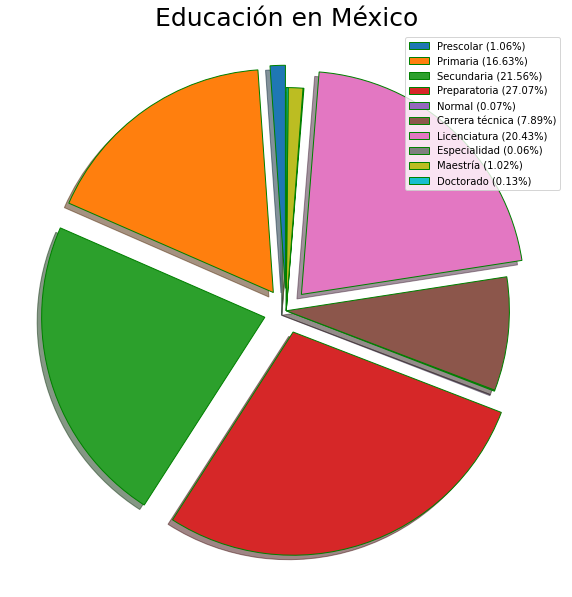

In [16]:
label = [ r"Prescolar (1.06%) ", r"Primaria (16.63%)", r"Secundaria (21.56%)", r"Preparatoria (27.07%)", r"Normal (0.07%)",
         r"Carrera técnica (7.89%)",r"Licenciatura (20.43%)", r"Especialidad (0.06%)", r"Maestría (1.02%)", r"Doctorado (0.13%)"]
explode = (0.1, 0.1, 0.1, 0.1, 0.0, 0.0,0.1, 0.0,0.0, 0.0)


fig, ax = plt.subplots(figsize =(10, 25))
texts, autotexts = ax.pie(data,    
                          explode=explode,
                          shadow = True,
                          startangle = 90, 
                          wedgeprops = { 'linewidth' : 1, 'edgecolor' : "green" }, 
                          textprops = dict(color ="magenta")) 
plt.legend(texts, label, loc="best")
plt.setp(autotexts, size = 50, weight ="bold") 
ax.set_title("Educación en México",size = 25) 
  
plt.show() 

Thus, in Mexico the $20.43 \%$ of people have university accomplished, therefore there are still a lot of people that can't have the opportunity to get into college.

## What type of courses does people in Mexico have?

In [17]:
df = pd.DataFrame({
    "C1":(7 * "(cuestio['S3P4_,").split(",")[:-1],
    "C2":list(range(1,8)),
    "C3":(7 * "']==1) | ,").split(",")[:-1]
    })

df["filtro"] = df["C1"] + df["C2"].astype(str) + df["C3"]

filtro = "".join(list(df["filtro"]))

100 * cuestio[eval(filtro[:-3])]["FAC18"].sum() / cuestio["FAC18"].sum()

21.81633424661501

Thus, only $21.82\%$ in México know about at least one course from the following:
* Physics or Mathematics (PhoM)
* Biology or Chemistry (BoC)
* Medicine (M)
* Humanities or Science Law (HoL)
* Social Science (Ss)
* Biotechnology (Bi)
* Engineer (E) \n


And from this $21.82\%$ we have that:

<ipython-input-18-9d2f20ae95d9>:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  texts, autotexts = ax.pie(data,


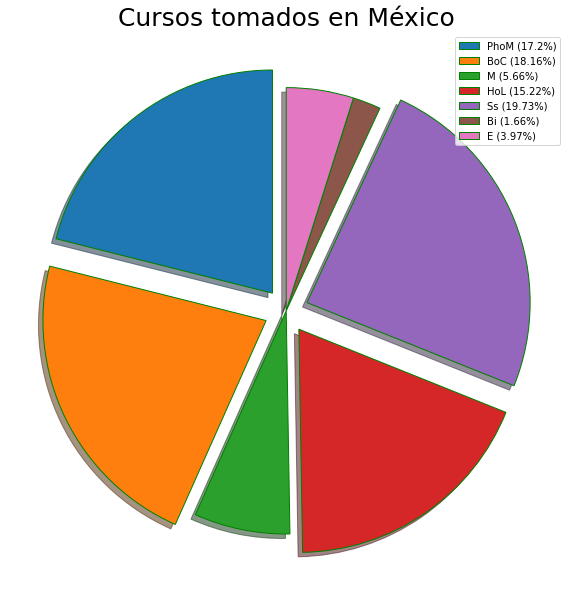

In [18]:

df1=[]
for i in range(1,8):
    df1.append(100 * cuestio[cuestio["S3P4_"+f"{i}"]==1]["FAC18"].sum()/cuestio["FAC18"].sum())
df1
data = pd.DataFrame([pd.Series(["PhoM","BoC","M","HoL","Ss","Bi","E"]),pd.Series(df1)]).transpose()
data.set_index(0, inplace = True)
label = [r"PhoM (17.2%)",r"BoC (18.16%)",r"M (5.66%)",r"HoL (15.22%)",r"Ss (19.73%)",r"Bi (1.66%)",r"E (3.97%)"]

explode = (0.1, 0.1, 0.0, 0.1, 0.1, 0.0,0.0)


fig, ax = plt.subplots(figsize =(10, 25))
texts, autotexts = ax.pie(data,    
                          explode=explode,
                          shadow = True,
                          startangle = 90, 
                          wedgeprops = { 'linewidth' : 1, 'edgecolor' : "green" }, 
                          textprops = dict(color ="magenta")) 
plt.legend(texts, label, loc="best")
plt.setp(autotexts, size = 50, weight ="bold") 
ax.set_title("Cursos tomados en México",size = 25) 
  
plt.show()


## What kind of discovery does mexican people are most interested in?

In [ ]:

df1=[]
for i in range(1,8):
    df1.append(100 * cuestio[cuestio["S4P1_2_"+f"{i}"]==1]["FAC18"].sum()/cuestio["FAC18"].sum())
df1
data = pd.DataFrame([pd.Series(["PhoM","BoC","M","HoL","Ss","Bi","E"]),pd.Series(df1)]).transpose()
data.set_index(0, inplace = True)
label = [r"PhoM (36.98%)",r"BoC (38.21%)",r"M (65.14%)",r"HoL (53.57%)",r"Ss (53.75%)",r"Bi (32.35%)",r"E (30.45%)"]

explode = (0.1, 0.1, 0.0, 0.1, 0.1, 0.0,0.0)


fig, ax = plt.subplots(figsize =(10, 25))
texts, autotexts = ax.hist(data,    
                          explode=explode,
                          shadow = True,
                          startangle = 90, 
                          wedgeprops = { 'linewidth' : 1, 'edgecolor' : "green" }, 
                          textprops = dict(color ="magenta")) 
plt.legend(texts, label, loc="best")
plt.setp(autotexts, size = 50, weight ="bold") 
ax.set_title("Cursos tomados en México",size = 25) 
  
plt.show()

## How many people have listened for at least one investigation center in Mexico?

In [20]:
df = pd.DataFrame({
    "C1":(27 * "(cuestio['S5P13_,").split(",")[:-1],
    "C2":list(range(1,28)),
    "C3":(27 * "']==1) | ,").split(",")[:-1]
    })

df["filtro"] = df["C1"] + df["C2"].astype(str) + df["C3"]

filtro = "".join(list(df["filtro"]))

100 * cuestio[eval(filtro[:-3])]["FAC18"].sum() / cuestio["FAC18"].sum()

34.24636591242631

Thus, only $34.25\%$ in México know about at least one investigation center